In [1]:
#import Clonal_tracing_class as ct
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import os
from scipy.stats.stats import pearsonr
import help_functions as hf
import sys
#%matplotlib inline

# Code purpose
We compute p values for clonal correlations observed in the clonal data, using a graphic model mentioned in the theory supplement. 

Specifically, we use clonal data obtained with droptout correciton obtained from "Clonal_annotation_T1T2", thus the name "withDropOutCorrection". The simulation parameters are fine-tuned to be consistent with this dataset.
To choose the dataset, set the file directory "mydir". Here, we use   

- mydir="./Combined_T1T2/Hamming_4/DropoutCorrection/". 

You can alse use clonal data generated using different Hamming distance (we use 4 here).  As the final clones are very robust to this parameter, different Hamming distances does not make much difference. 

In [2]:
mydir="./Combined_T1T2/Hamming_4/DropoutCorrection/"

# Initialization

In [3]:
P_ex=0.56 # 0.7, the probability to get extracted from the bone marrow +FACS
P_sp=0.5 # 0.5, the probability to be sampled when splitting the sample half by half for seconary transplantation
P_indrops=0.5; # the portion of the sample splitted for inDrops
P_nd=0.7 # 0.7, the non-dropout probability during Sequencing
P_eg=0.086 # chance to be successfully engrafted, 0.086 for this DropoutCorrected data, and 0.137 for NoCorrection data 
alpha=0.91 # 0.887 for NoCoorection approach; 0.91 for DropoutCorrected clustering. 
N_initial_clone=262 # T1_clone_number/(1-P_00);  262 for DropoutCorrected clones, and 465 for the NoCorrection clones
Is_null_model=1; # default 1
my_list=[0.1,0.2,0.5,1.01,2,5,10,20]; # for binning the data
plot_fig=[1,3]; # plot figures with caption R1 and R2

In [4]:
fig_dir_0=mydir+"figure/";
fig_dir=mydir+"figure/simulation/"
data_dir=mydir+"analysis/"
#data_dir=mydir+"analysis/T1_T2_/"
if not os.path.exists(fig_dir_0):
    !mkdir $fig_dir_0;
    
if not os.path.exists(fig_dir):
    !mkdir $fig_dir;
    
if not os.path.exists(data_dir):
    !mkdir $data_dir;

sys.path.append(data_dir) #expand the searching path


# import relevant parameters from another program
import corr_variables_etc as rp
cutoff_small=rp.cutoff_small;
cutoff_large=rp.cutoff_large;
pseudo_act_exp=rp.pseudo_act_exp;
threshold=rp.threshold;

P_array=[P_ex,P_indrops,P_sp,P_nd,P_eg];

In [5]:
threshold

1.9

In [6]:
all_data=np.load(data_dir+"all_data.npy");
all_data

array([[  39,   12,  483,  773, 1035, 1943],
       [   1,    0,    0,    0,    0,    0],
       [   0,    3,    0,    0,    0,    0],
       ...,
       [   0,    2,    0,    0,    0,    0],
       [   0,   18,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1]])

# Loading data

In [7]:
all_data=np.load(data_dir+"all_data.npy");
T1_HSC_info_0=all_data[:,0];
T1_Kit_info_0=all_data[:,1];
# only keep the 1T data set
index=(T1_HSC_info_0+T1_Kit_info_0)>0;
T1_HSC_info_0=T1_HSC_info_0[index];
T1_Kit_info_0=T1_Kit_info_0[index];

# a quick check of consistency
corr_HSC_Kit_T1=pearsonr(T1_HSC_info_0,T1_Kit_info_0)[0];
print("Corr (T1HSC-T1Kit):",corr_HSC_Kit_T1)
print("Total clone number is",len(T1_HSC_info_0))

# add the missed clones
T1_HSC_info=np.concatenate((np.array(T1_HSC_info_0),np.zeros(int(np.round((1-alpha)/alpha*len(T1_HSC_info_0))))));
T1_Kit_info=np.concatenate((np.array(T1_Kit_info_0),np.zeros(int(np.round((1-alpha)/alpha*len(T1_Kit_info_0))))));

Corr (T1HSC-T1Kit): 0.5466451421626866
Total clone number is 239


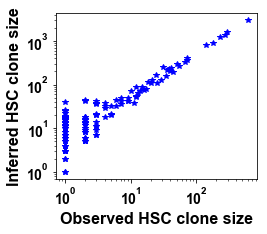

In [8]:
# infer the HSC clone size inside the mouse
inferred_T1_HSC_info=hf.inferred_clone_size(T1_HSC_info,P_ex*P_sp*P_nd)
inferred_T1_Kit_info=hf.inferred_clone_size(T1_Kit_info,P_ex*P_sp*P_nd)
inferred_T1_HSC_info=inferred_T1_HSC_info.astype(int);
inferred_T1_Kit_info=inferred_T1_Kit_info.astype(int);


# inferred_T2_HSC_info=hf.inferred_clone_size(T2_HSC_info,P_ex*P_nd)
# inferred_T2_Kit_info=hf.inferred_clone_size(T2_Kit_info,P_ex*P_nd)
# # assume the ?% of engrafted HSC die without giving rise to progenies
# inferred_T2_HSC_info=np.concatenate((np.array(inferred_T2_HSC_info),np.zeros(int(np.round(P_failed_expand*len(inferred_T2_HSC_info))))));
# inferred_T2_HSC_info=inferred_T2_HSC_info.astype(int);
# inferred_T2_Kit_info=np.concatenate((np.array(inferred_T2_Kit_info),np.zeros(int(np.round(P_failed_expand*len(inferred_T2_Kit_info))))));
# inferred_T2_Kit_info=inferred_T2_Kit_info.astype(int);


%run my_fig_config_0
fig = plt.figure(figsize=(4,3.5)); ax = fig.add_subplot(1, 1, 1)
ax.plot(T1_HSC_info,inferred_T1_HSC_info[0:len(T1_HSC_info)],"*",color="b")
ax.set_xlabel("Observed HSC clone size");
ax.set_ylabel("Inferred HSC clone size");
ax.set_xscale("log")
ax.set_yscale('log')
fig.tight_layout();
fig.savefig(fig_dir+"Observed_inferred_HSC_clone_size.eps")

# %run my_fig_config
# ax.plot(T1_Kit_info,inferred_T1_Kit_info[0:len(T1_HSC_info)],"*",color="b")
# ax.set_xlabel("Observed Kit clone size");
# ax.set_ylabel("Inferred Kit clone size");
# ax.set_xscale("log")
# ax.set_yscale('log')
# fig.tight_layout();
# fig.savefig(fig_dir+"Observed_inferred_Kit_clone_size.eps")


In [9]:
# ##  test the effect of correlated-input fluctuations [Increase the clone_upper_size can enhance correlation]
# tot_run=1000;
# clone_upper_size=100;
# x1=np.zeros(tot_run)
# x2=np.zeros(tot_run)
# corr_array=np.zeros(tot_run)
# L=100;
# for l in range(tot_run):
#     for k in range(L):
#         engrafted_N=np.random.randint(1,clone_upper_size);
#         #print(engrafted_N)
#         x1[k]=sum([np.random.choice(inferred_T1_HSC_info) for j in range(engrafted_N)])
#         x2[k]=sum([np.random.choice(inferred_T1_HSC_info) for j in range(engrafted_N)])
#     corr_array[l]=pearsonr(x1,x2)[0];
    
# plt.hist(corr_array,50,color='r');

# Analysis for the inferred data

In [10]:
# test all kinds of correlation between clone sizes

#shared_clone_size=len(inferred_T1_HSC_info);
#hf.plot_figs_correlation(inferred_T1_HSC_info, inferred_T1_Kit_info, inferred_T2_HSC_info, inferred_T2_Kit_info, fig_dir)


In [11]:
# test correlation between expansion capacity in T1 and T2

#cutoff_small=10;cutoff_large=300
#hf.plot_figs_expansion_activity(cutoff_small, cutoff_large, inferred_T1_HSC_info, inferred_T1_Kit_info, inferred_T2_HSC_info, inferred_T2_Kit_info, fig_dir)

In [12]:
# total clone expansion in T2
# [mean_ratio,std_ratio]=hf.plot_figs_1Tactivity_2Texpansion(cutoff_small, pseudo_act_exp, threshold, inferred_T1_HSC_info, inferred_T1_Kit_info, inferred_T2_HSC_info, inferred_T2_Kit_info, fig_dir)


In [13]:
# result=hf.plot_average_expansion(potency_T1[index_large_HSC],expansion_T2[index_large_HSC],my_list,1,fig_dir);
# #plt.plot(result[:,0],result[:,1],'*r');
# #plt.plot(result[:,0],result[:,2],'*r');

# %run my_fig_config
# ax.errorbar(result[:,0],result[:,1],result[:,2], fmt='.k',ecolor='gray')
# ax.set_xlabel("1T activity");
# ax.set_ylabel("2T expansion");
# fig.tight_layout();
# #ax.set_yscale('log')
# ax.set_ylim((-0.1,15))
# ax.set_xscale('log')
# fig.savefig(fig_dir+"potency_1T2T_mean_std2.eps")


## selecting model for analysis

In [14]:
if Is_null_model:
    my_model=hf.multi_clone_model_sampling_M1_kit_two_mouse;
    data=my_model(N_initial_clone,P_array,inferred_T1_HSC_info,inferred_T1_Kit_info);
else:
    my_model=hf.multi_clone_model_activity_based_sampling_M1_Kit;
    expan_thres=1;
    activ_thres=1;
    data=my_model(N_initial_clone,P_array,expan_thres,activ_thres,inferred_T1_HSC_info,inferred_T1_Kit_info);   
        
        
simu_HSC_T1=np.array(data[:,0]);
simu_HSC_T2R1=np.array(data[:,1]);
simu_HSC_T2R2=np.array(data[:,2]);
simu_Kit_T1=np.array(data[:,3]);
simu_Kit_T2R1=np.array(data[:,4]);
simu_Kit_T2R2=np.array(data[:,5]);
simu_T1=simu_HSC_T1+simu_Kit_T1
simu_T2R1=simu_HSC_T2R1+simu_Kit_T2R1
simu_T2R2=simu_HSC_T2R2+simu_Kit_T2R2
    


N_shared_clone=sum((simu_T1>0) & (simu_T2R1>0))
N_clone_T2R1=sum(simu_T2R1>0);
N_clone_T1=sum(simu_T1>0);
N_clone_T2R2=sum(simu_T2R2>0);
print("Shared clone number:",N_shared_clone);
print("Clone number in T1:",N_clone_T1)
print("Clone number in T2-R1:",N_clone_T2R1)
print("Clone number in T2-R2:",N_clone_T2R2)
print("Total initial clone number:",len(data[:,0]))

Shared clone number: 54
Clone number in T1: 232
Clone number in T2-R1: 54
Clone number in T2-R2: 47
Total initial clone number: 262


In [15]:
# hf.plot_figs_correlation(plot_fig,simu_HSC_T1, simu_Kit_T1,simu_HSC_T2E2,simu_Kit_T2E2, fig_dir);

# Ensembles of simulations

In [16]:
## Run N times to get a distribution of the T1-T2 correlation, then estimate the P value
Ensemble_N=10000;
plot_fig=0;

N_clone_T1_array=np.zeros(Ensemble_N);
N_clone_T2R1_array=np.zeros(Ensemble_N);
N_clone_T2R2_array=np.zeros(Ensemble_N);
N_clone_T2_array=np.zeros(Ensemble_N);
N_shared_clone_array_T1T2=np.zeros(Ensemble_N);
N_shared_clone_array_T1R1R2=np.zeros(Ensemble_N);

Corr_simu_T1HSC_T2HSC_array=np.zeros(Ensemble_N);
Corr_simu_T1HSC_T2Kit_array=np.zeros(Ensemble_N);
Corr_simu_T2HSC_T2Kit_array=np.zeros(Ensemble_N);
Corr_simu_T1Kit_T2Kit_array=np.zeros(Ensemble_N);
Corr_simu_T1HSC_T1Kit_array=np.zeros(Ensemble_N);
Corr_simu_T1Kit_T2HSC_array=np.zeros(Ensemble_N);
Corr_simu_T1tot_T2tot_array=np.zeros(Ensemble_N);

Corr_simu_T2R1HSC_T2R2HSC_array=np.zeros(Ensemble_N);
Corr_simu_T2R1HSC_T2R2Kit_array=np.zeros(Ensemble_N);
Corr_simu_T2R1Kit_T2R2Kit_array=np.zeros(Ensemble_N);
Corr_simu_T2R1tot_T2R2tot_array=np.zeros(Ensemble_N);
Corr_simu_T2R1HSC_T2R1Kit_array=np.zeros(Ensemble_N);
Corr_simu_T2R1T2R2_expansion=np.zeros(Ensemble_N);

Corr_simu_T1T2potency_array=np.zeros(Ensemble_N);
Corr_simu_T1T2expansion_array=np.zeros(Ensemble_N);
Corr_simu_T1potency_T2expansion_array=np.zeros(Ensemble_N);
Corr_simu_T1expansion_T2potency_array=np.zeros(Ensemble_N);

Mean_ratio_HSC_array_T1T2=np.zeros(Ensemble_N);
Mean_ratio_Kit_array_T1T2=np.zeros(Ensemble_N);
Mean_ratio_array_T1T2=np.zeros(Ensemble_N);
std_ratio_HSC_array_T1T2=np.zeros(Ensemble_N);
std_ratio_Kit_array_T1T2=np.zeros(Ensemble_N);
std_ratio_array_T1T2=np.zeros(Ensemble_N);
finer_mean_std_T1T2=np.zeros((len(my_list),3));

Mean_ratio_array_T1R2=np.zeros(Ensemble_N);
Mean_ratio_array_T1R1=np.zeros(Ensemble_N);
std_ratio_array_T1R2=np.zeros(Ensemble_N);
std_ratio_array_T1R1=np.zeros(Ensemble_N);
Mean_ratio_array_HSC_T1R2=np.zeros(Ensemble_N);
Mean_ratio_array_HSC_T1R1=np.zeros(Ensemble_N);
std_ratio_array_HSC_T1R2=np.zeros(Ensemble_N);
std_ratio_array_HSC_T1R1=np.zeros(Ensemble_N);
Mean_ratio_array_Kit_T1R2=np.zeros(Ensemble_N);
Mean_ratio_array_Kit_T1R1=np.zeros(Ensemble_N);
std_ratio_array_Kit_T1R2=np.zeros(Ensemble_N);
std_ratio_array_Kit_T1R1=np.zeros(Ensemble_N);
#Corr_simu_T1potency_T2expansion_array=np.zeros(Ensemble_N);

        
for k in range(Ensemble_N):
    
    # infer the HSC clone size inside the mouse
    inferred_T1_HSC_info=hf.inferred_clone_size(T1_HSC_info,P_ex*P_sp*P_nd)
    inferred_T1_Kit_info=hf.inferred_clone_size(T1_Kit_info,P_ex*P_sp*P_nd)
    inferred_T1_HSC_info=inferred_T1_HSC_info.astype(int);
    inferred_T1_Kit_info=inferred_T1_Kit_info.astype(int);
    
    if Is_null_model:
        data=my_model(N_initial_clone,P_array,inferred_T1_HSC_info,inferred_T1_Kit_info);
    else:
        data=my_model(N_initial_clone,P_array,expan_thres,activ_thres,inferred_T1_HSC_info,inferred_T1_Kit_info);
        
    simu_HSC_T1=np.array(data[:,0]);
    simu_HSC_T2R1=np.array(data[:,1]);
    simu_HSC_T2R2=np.array(data[:,2]);
    simu_HSC_T2=simu_HSC_T2R1+simu_HSC_T2R2;
    simu_Kit_T1=np.array(data[:,3]);
    simu_Kit_T2R1=np.array(data[:,4]);
    simu_Kit_T2R2=np.array(data[:,5]);
    simu_Kit_T2=simu_Kit_T2R1+simu_Kit_T2R2;
    simu_T1=simu_HSC_T1+simu_Kit_T1
    simu_T2R1=simu_HSC_T2R1+simu_Kit_T2R1
    simu_T2R2=simu_HSC_T2R2+simu_Kit_T2R2
    simu_T2=simu_T2R1+simu_T2R2

    ##### 1T-2T 
    N_clone_T1_array[k]=sum(simu_T1>0);    
    N_clone_T2_array[k]=sum(simu_T2>0);
    N_shared_clone_array_T1T2[k]=sum((simu_T1>0) & (simu_T2>0));
    Corr_simu_T1HSC_T2HSC_array[k]=pearsonr(simu_HSC_T1,simu_HSC_T2)[0];
    Corr_simu_T1HSC_T2Kit_array[k]=pearsonr(simu_HSC_T1,simu_Kit_T2)[0];
    Corr_simu_T2HSC_T2Kit_array[k]=pearsonr(simu_HSC_T2,simu_Kit_T2)[0];
    Corr_simu_T1Kit_T2Kit_array[k]=pearsonr(simu_Kit_T1,simu_Kit_T2)[0];
    Corr_simu_T1HSC_T1Kit_array[k]=pearsonr(simu_HSC_T1,simu_Kit_T1)[0];
    Corr_simu_T1Kit_T2HSC_array[k]=pearsonr(simu_Kit_T1,simu_HSC_T2)[0];
    Corr_simu_T1tot_T2tot_array[k]=pearsonr(simu_T1,simu_T2)[0];

    potency_T1=(simu_Kit_T1+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_T2=(simu_T2+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_T2_HSC=(simu_HSC_T2+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_T2_Kit=(simu_Kit_T2+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_T1=(simu_HSC_T1+pseudo_act_exp)/(1+pseudo_act_exp);
    potency_T2=(simu_Kit_T2+pseudo_act_exp)/(simu_HSC_T2+pseudo_act_exp);
    used_clone_index_1=(simu_HSC_T1>=cutoff_small) #cutoff_small=0 is used in the paper, so all data is used
    
# statistical significance of T1 activity-T2 expansion relation
    data_1=expansion_T2[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_T2[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_array_T1T2[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_array_T1T2[k]=np.std(data_1)/np.std(data_2);

# statistical significance of T1 activity-T2 HSC expansion relation
    data_1=expansion_T2_HSC[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_T2_HSC[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_HSC_array_T1T2[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_HSC_array_T1T2[k]=np.std(data_1)/np.std(data_2);
    
# statistical significance of T1 activity-T2 HSC expansion relation
    data_1=expansion_T2_Kit[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_T2_Kit[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_Kit_array_T1T2[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_Kit_array_T1T2[k]=np.std(data_1)/np.std(data_2);
    

    Corr_simu_T1T2expansion_array[k]=pearsonr(expansion_T1[used_clone_index_1],expansion_T2[used_clone_index_1])[0];
    Corr_simu_T1expansion_T2potency_array[k]=pearsonr(expansion_T1[used_clone_index_1],potency_T2[used_clone_index_1])[0];
    Corr_simu_T1T2potency_array[k]=pearsonr(potency_T1[used_clone_index_1],potency_T2[used_clone_index_1])[0];
    Corr_simu_T1potency_T2expansion_array[k]=pearsonr(potency_T1[used_clone_index_1],expansion_T2[used_clone_index_1])[0];

    plot_fig1=[0,0];
    finer_mean_std_T1T2+=hf.plot_average_expansion(potency_T1[used_clone_index_1],expansion_T2[used_clone_index_1],my_list,plot_fig1,fig_dir)

    
    #### R1-R2
    N_clone_T2R1_array[k]=sum(simu_T2R1>0);
    N_clone_T2R2_array[k]=sum(simu_T2R2>0);
    N_shared_clone_array_T1R1R2[k]=sum((simu_T1>0) & (simu_T2R1>0) & (simu_T2R2>0));
    Corr_simu_T2R1HSC_T2R2HSC_array[k]=pearsonr(simu_HSC_T2R1,simu_HSC_T2R2)[0];
    Corr_simu_T2R1HSC_T2R2Kit_array[k]=pearsonr(simu_HSC_T2R1,simu_Kit_T2R2)[0];
    Corr_simu_T2R1Kit_T2R2Kit_array[k]=pearsonr(simu_Kit_T2R1,simu_Kit_T2R2)[0];
    Corr_simu_T2R1HSC_T2R1Kit_array[k]=pearsonr(simu_HSC_T2R1,simu_Kit_T2R1)[0];
    Corr_simu_T2R1tot_T2R2tot_array[k]=pearsonr(simu_T2R1,simu_T2R2)[0];

    
    expansion_T2R1=(simu_T2R1+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_HSC_T2R1=(simu_HSC_T2R1+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_Kit_T2R1=(simu_Kit_T2R1+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_T2R2=(simu_T2R2+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_HSC_T2R2=(simu_HSC_T2R2+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    expansion_Kit_T2R2=(simu_Kit_T2R2+pseudo_act_exp)/(simu_HSC_T1+pseudo_act_exp);
    used_clone_index_1=(simu_HSC_T1>=cutoff_small) 
    
    # statistical significance of T1 activity-T2R1 expansion relation
    data_1=expansion_T2R1[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_T2R1[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_array_T1R1[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_array_T1R1[k]=np.std(data_1)/np.std(data_2);

    data_1=expansion_HSC_T2R1[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_HSC_T2R1[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_array_HSC_T1R1[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_array_HSC_T1R1[k]=np.std(data_1)/np.std(data_2);
    
    data_1=expansion_Kit_T2R1[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_Kit_T2R1[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_array_Kit_T1R1[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_array_Kit_T1R1[k]=np.std(data_1)/np.std(data_2);
    
    # statistical significance of T1 activity-T2R2 expansion relation
    data_1=expansion_T2R2[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_T2R2[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_array_T1R2[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_array_T1R2[k]=np.std(data_1)/np.std(data_2);

    data_1=expansion_HSC_T2R2[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_HSC_T2R2[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_array_HSC_T1R2[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_array_HSC_T1R2[k]=np.std(data_1)/np.std(data_2);
    
    data_1=expansion_Kit_T2R2[used_clone_index_1][potency_T1[used_clone_index_1]<threshold]
    data_2=expansion_Kit_T2R2[used_clone_index_1][potency_T1[used_clone_index_1]>=threshold]
    Mean_ratio_array_Kit_T1R2[k]=np.mean(data_1)/np.mean(data_2);
    std_ratio_array_Kit_T1R2[k]=np.std(data_1)/np.std(data_2);
    
    Corr_simu_T2R1T2R2_expansion[k]=pearsonr(expansion_T2R1[used_clone_index_1],expansion_T2R2[used_clone_index_1])[0];
    

    
## There is NO indentation here
finer_mean_std_T1T2=finer_mean_std_T1T2/Ensemble_N;    


In [17]:
finer_mean_std_T1T2

array([[ 0.05      ,  6.3610238 ,  7.87052039],
       [ 0.149665  ,  5.28193255, 13.5344043 ],
       [ 0.35      ,  5.22763139, 22.85983016],
       [ 0.755     ,  5.68964824, 27.6432321 ],
       [ 1.505     ,  5.35183971, 23.58518094],
       [ 3.5       ,  5.35411054, 23.08404842],
       [ 7.5       ,  5.66041892, 16.19958005],
       [15.        ,  5.9793569 , 12.14729752]])

Mean for 1T clone number:  238.3213
Standard deviation for 1T clone number:  5.0903110229140225
Experimental value for 1T clone number:  239
P value for 1T clone number:  0.4235
Mean for 2T clone number:  72.0665
Standard deviation for 2T clone number:  7.4548157421897425
Experimental value for 2T clone number:  70
P value for 2T clone number:  0.4223
Mean for Clone # ratio: 2T/1T:  0.3024119459371387
Standard deviation for Clone # ratio: 2T/1T:  0.030812393852578904
Experimental value for Clone # ratio: 2T/1T:  0.2928870292887029
P value for Clone # ratio: 2T/1T:  0.3841
Mean for Fraction of shared clone:  1.026703752836321
Standard deviation for Fraction of shared clone:  0.019953435279921453
Experimental value for Fraction of shared clone:  2.19672131147541
P value for Fraction of shared clone:  0.0
Mean for Corr: HSC$^{1T}$-HSC$^{2T}$:  0.7489057199234952
Standard deviation for Corr: HSC$^{1T}$-HSC$^{2T}$:  0.13030459310181264
Experimental value for Corr: HSC$^{1T}$-HSC$^{2T}$:  0.

/Users/shouwenwang/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


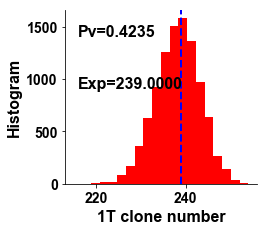

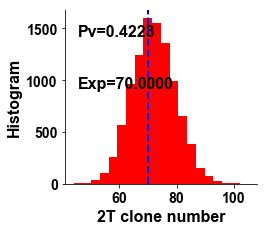

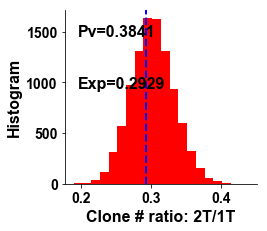

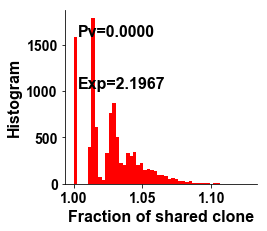

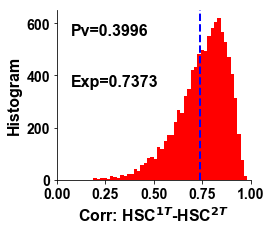

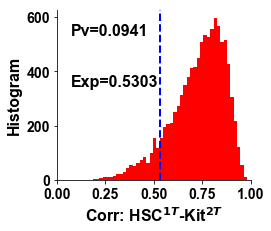

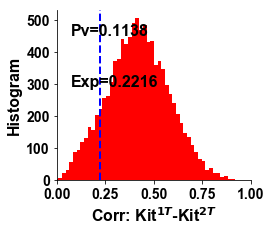

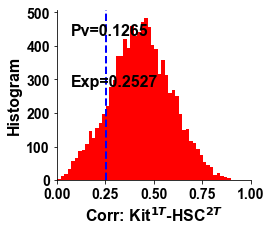

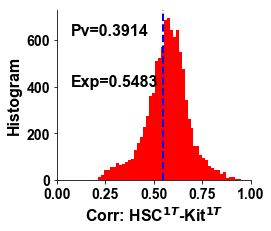

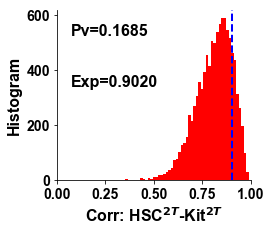

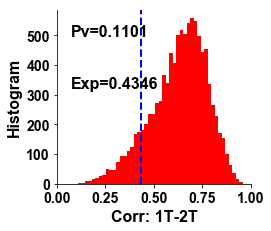

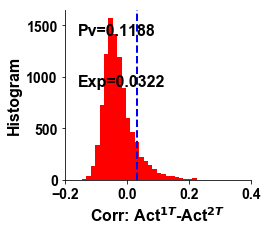

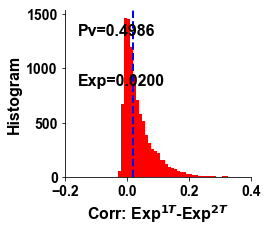

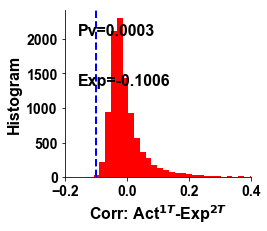

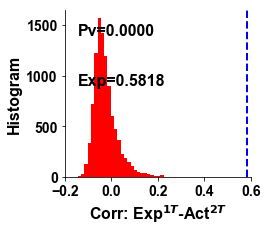

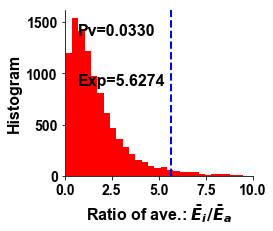

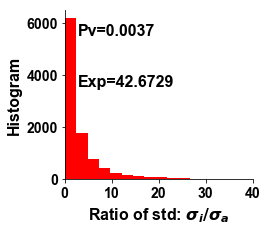

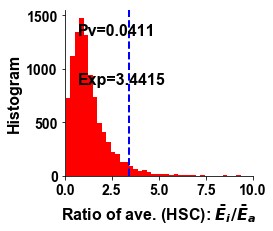

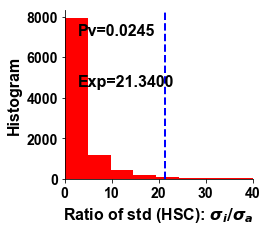

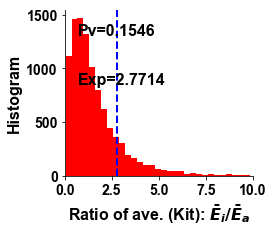

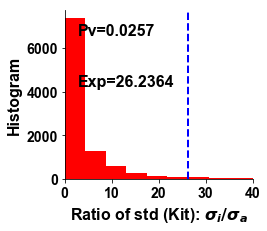

In [18]:
## for T1 and T2

simu_data=N_clone_T1_array;  bin_N=20; exp_point=rp.clone_N_T1; xlim=[]; xlabel="1T clone number";  
mean_std_T1_clone_size=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=N_clone_T2_array;  bin_N=20; exp_point=rp.clone_N_T2; xlim=[];xlabel="2T clone number"; 
mean_std_T2_clone_size=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=N_clone_T2_array/N_clone_T1_array;  bin_N=20; exp_point=rp.clone_N_T2/rp.clone_N_T1; xlim=[]; 
xlabel="Clone # ratio: 2T/1T"; file_name="Clone_N_ratio_2T_1T"
mean_std_T2_clone_size=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);


simu_data=N_clone_T2_array/N_shared_clone_array_T1T2;  bin_N=50; exp_point=134/61; xlim=[]; xlabel="Fraction of shared clone";  
mean_std_shared_clone=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=Corr_simu_T1HSC_T2HSC_array;  bin_N=50; exp_point=rp.corr_T1HSC_T2HSC; xlim=[0,1]; 
xlabel="Corr: HSC"+r"$^{1T}$"+"-HSC"+r"$^{2T}$";
mean_std_1THSC_2THSC=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=Corr_simu_T1HSC_T2Kit_array;  bin_N=50; exp_point=rp.corr_T1HSC_T2Kit; xlim=[0,1]; 
xlabel="Corr: HSC"+r"$^{1T}$"+"-Kit"+r"$^{2T}$";
mean_std_1THSC_2TKit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=Corr_simu_T1Kit_T2Kit_array;  bin_N=50; exp_point=rp.corr_T1Kit_T2Kit; xlim=[0,1]; 
xlabel="Corr: Kit"+r"$^{1T}$"+"-Kit"+r"$^{2T}$";
mean_std_1TKit_2TKit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=Corr_simu_T1Kit_T2HSC_array;  bin_N=50; exp_point=rp.corr_T1Kit_T2HSC; xlim=[0,1]; 
xlabel="Corr: Kit"+r"$^{1T}$"+"-HSC"+r"$^{2T}$"; 
mean_std_1TKit_2THSC=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=Corr_simu_T1HSC_T1Kit_array;  bin_N=50; exp_point=rp.corr_T1HSC_T1Kit; xlim=[0,1]; 
xlabel="Corr: HSC"+r"$^{1T}$"+"-Kit"+r"$^{1T}$"; 
mean_std_1THSC_1TKit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T2HSC_T2Kit_array;  bin_N=50; exp_point=rp.corr_T2HSC_T2Kit; xlim=[0,1]; 
xlabel="Corr: HSC"+r"$^{2T}$"+"-Kit"+r"$^{2T}$"; 
mean_std_2THSC_2TKit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T1tot_T2tot_array;  bin_N=50; exp_point=rp.corr_T1cloneT2clone; xlim=[0,1];
xlabel="Corr: 1T-2T"; 
mean_std_1T_2T=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T1T2potency_array;  bin_N=50; exp_point=rp.corr_T1actT2act; xlim=[-0.2,0.4]; 
xlabel="Corr: Act"+r"$^{1T}$"+"-Act"+r"$^{2T}$"; 
mean_std_1TAct_2TAct=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T1T2expansion_array;  bin_N=50; exp_point=rp.corr_T1expT2exp; xlim=[-0.2,0.4]; 
xlabel="Corr: Exp"+r"$^{1T}$"+"-Exp"+r"$^{2T}$"; 
mean_std_1TAct_2TAct=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T1potency_T2expansion_array;  bin_N=50; exp_point=rp.corr_T1actT2exp; xlim=[-0.2,0.4]; 
xlabel="Corr: Act"+r"$^{1T}$"+"-Exp"+r"$^{2T}$"; 
mean_std_1TAct_2TAct=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T1T2potency_array;  bin_N=50; exp_point=rp.corr_T1expT2act; xlim=[-0.2,0.6]; 
xlabel="Corr: Exp"+r"$^{1T}$"+"-Act"+r"$^{2T}$"; 
mean_std_1TAct_2TAct=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=Mean_ratio_array_T1T2;  bin_N=50; exp_point=rp.mean_ratio_T1T2; xlim=[0,10]; xlabel="Ratio of ave.: "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio"  
mean_std_mean_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_array_T1T2;  bin_N=50; exp_point=rp.std_ratio_T1T2; xlim=[0,40]; xlabel="Ratio of std: "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio"  
mean_std_std_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=Mean_ratio_HSC_array_T1T2;  bin_N=50; exp_point=rp.mean_ratio_HSC_T1T2; xlim=[0,10]; xlabel="Ratio of ave. (HSC): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio_HSC"  
mean_std_mean_ratio_HSC=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_HSC_array_T1T2;  bin_N=50; exp_point=rp.std_ratio_HSC_T1T2; xlim=[0,40]; xlabel="Ratio of std (HSC): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio_HSC"  
mean_std_std_ratio_HSC=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=Mean_ratio_Kit_array_T1T2;  bin_N=50; exp_point=rp.mean_ratio_Kit_T1T2; xlim=[0,10]; xlabel="Ratio of ave. (Kit): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio_Kit"  
mean_std_mean_ratio_Kit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_Kit_array_T1T2;  bin_N=50; exp_point=rp.std_ratio_Kit_T1T2; xlim=[0,40]; xlabel="Ratio of std (Kit): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio_Kit"  
mean_std_std_ratio_Kit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);


# simu_data=Size_win2_array;  bin_N=50; exp_point=0; xlim=[]; xlabel="Data N in Win 2"; file_name="Size_win2_array"  
# hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);


Mean for 1T clone number:  238.3213
Standard deviation for 1T clone number:  5.0903110229140225
Experimental value for 1T clone number:  239
P value for 1T clone number:  0.4235
Mean for R1 clone number:  49.6381
Standard deviation for R1 clone number:  6.4714548897446535
Experimental value for R1 clone number:  49.0
P value for R1 clone number:  0.4991
Mean for Number of shared clone:  26.9945
Standard deviation for Number of shared clone:  5.033772914027807
Experimental value for Number of shared clone:  27
P value for Number of shared clone:  0.4469
Mean for Corr: HSC$^{R1}$-HSC$^{R2}$:  0.4273578478051253
Standard deviation for Corr: HSC$^{R1}$-HSC$^{R2}$:  0.20881561626477144
Experimental value for Corr: HSC$^{R1}$-HSC$^{R2}$:  0.8203251201312534
P value for Corr: HSC$^{R1}$-HSC$^{R2}$:  0.0352
Mean for Corr: HSC$^{R1}$-Kit$^{R2}$:  0.4076349517633159
Standard deviation for Corr: HSC$^{R1}$-Kit$^{R2}$:  0.20942125590537156
Experimental value for Corr: HSC$^{R1}$-Kit$^{R2}$:  0.745

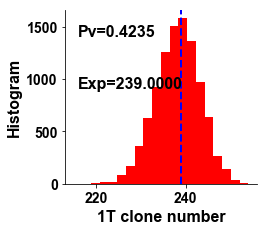

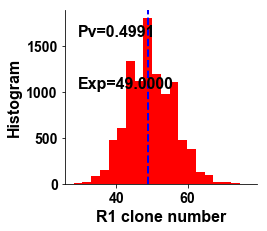

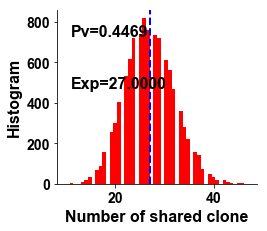

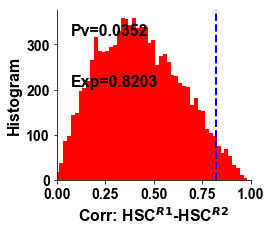

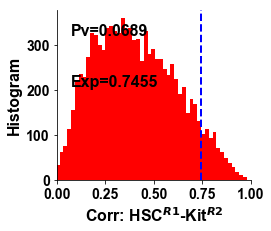

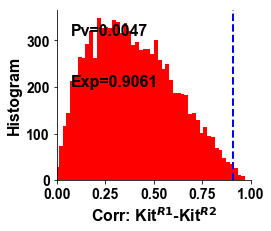

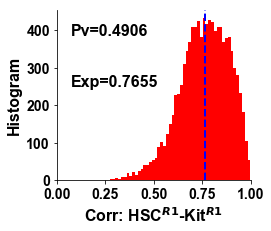

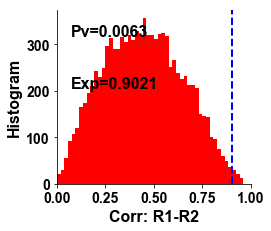

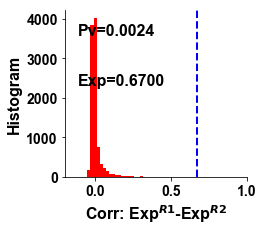

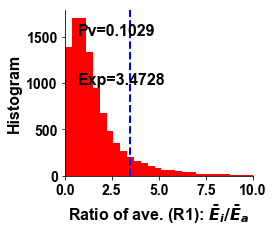

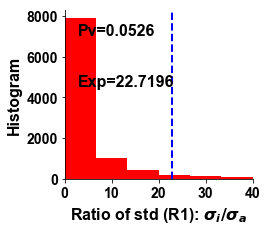

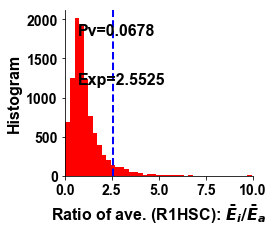

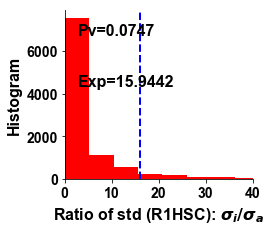

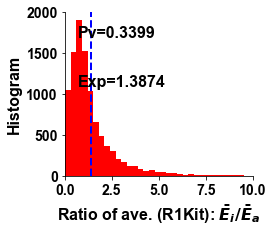

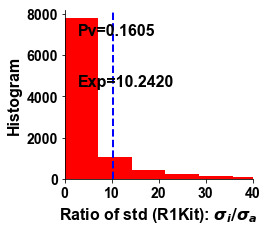

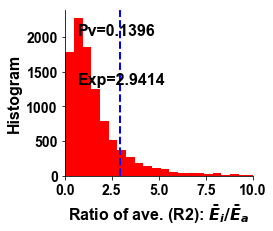

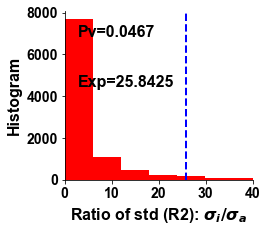

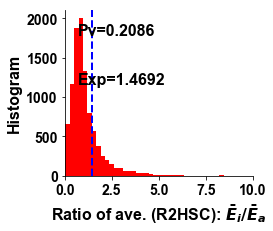

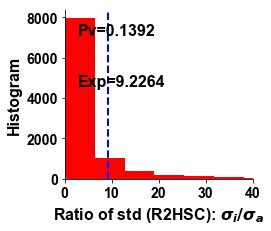

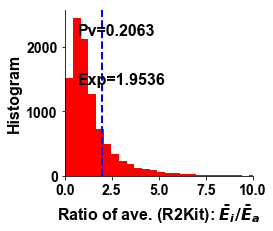

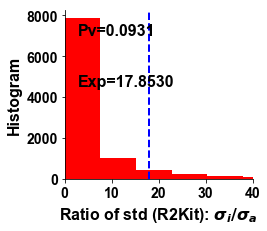

In [19]:
############ FOR R1 and R2

simu_data=N_clone_T1_array;  bin_N=20; exp_point=rp.clone_N_T1; xlim=[]; xlabel="1T clone number";  
mean_std_T1_clone_size=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=N_clone_T2R1_array;  bin_N=20; exp_point=(rp.clone_N_T2R2+rp.clone_N_T2R1)/2; xlim=[]; xlabel="R1 clone number";  
mean_std_R1_clone_size=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);
# simu_data=N_clone_T2R2_array;  bin_N=20; exp_point=rp.clone_N_T2; xlim=[]; xlabel="R2 clone size";  
# hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=N_shared_clone_array_T1R1R2;  bin_N=50; exp_point=27; xlim=[]; xlabel="Number of shared clone";  
mean_std_shared_clone_size=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T2R1HSC_T2R2HSC_array;  bin_N=50; exp_point=rp.corr_R1HSC_R2HSC; xlim=[0,1]; xlabel="Corr: HSC"+r"$^{R1}$"+"-HSC"+r"$^{R2}$";  
mean_std_R1HSC_R2HSC=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T2R1HSC_T2R2Kit_array;  bin_N=50; exp_point=rp.corr_R1HSC_R2Kit; xlim=[0,1]; xlabel="Corr: HSC"+r"$^{R1}$"+"-Kit"+r"$^{R2}$";  
mean_std_R1HSC_R2Kit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T2R1Kit_T2R2Kit_array;  bin_N=50; exp_point=rp.corr_R1Kit_R2Kit; xlim=[0,1]; xlabel="Corr: Kit"+r"$^{R1}$"+"-Kit"+r"$^{R2}$";  
mean_std_R1Kit_R2Kit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T2R1HSC_T2R1Kit_array;  bin_N=50; exp_point=rp.corr_R1HSC_R1Kit; xlim=[0,1]; xlabel="Corr: HSC"+r"$^{R1}$"+"-Kit"+r"$^{R1}$";  
mean_std_R1HSC_R1Kit=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data=Corr_simu_T2R1tot_T2R2tot_array;  bin_N=50; exp_point=rp.corr_R1cloneR2clone; xlim=[0,1]; xlabel="Corr: R1-R2";  
mean_std_R1_R2=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);

simu_data= Corr_simu_T2R1T2R2_expansion;  bin_N=50; exp_point=0.67; xlim=[-0.2,1]; xlabel="Corr: Exp"+r"$^{R1}$"+"-Exp"+r"$^{R2}$";  
mean_std_R1Exp_R2Exp=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,xlabel);


simu_data=Mean_ratio_array_T1R1;  bin_N=50; exp_point=rp.mean_ratio_T1R1; xlim=[0,10]; xlabel="Ratio of ave. (R1): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio-R1"  
mean_std_mean_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_array_T1R1;  bin_N=50; exp_point=rp.std_ratio_T1R1; xlim=[0,40]; xlabel="Ratio of std (R1): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio-R1"  
mean_std_std_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=Mean_ratio_array_HSC_T1R1;  bin_N=50; exp_point=rp.mean_ratio_HSC_T1R1; xlim=[0,10]; xlabel="Ratio of ave. (R1HSC): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio-R1HSC"  
mean_std_mean_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_array_HSC_T1R1;  bin_N=50; exp_point=rp.std_ratio_HSC_T1R1; xlim=[0,40]; xlabel="Ratio of std (R1HSC): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio-R1HSC"  
mean_std_std_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=Mean_ratio_array_Kit_T1R1;  bin_N=50; exp_point=rp.mean_ratio_Kit_T1R1; xlim=[0,10]; xlabel="Ratio of ave. (R1Kit): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio-R1Kit"  
mean_std_mean_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_array_Kit_T1R1;  bin_N=50; exp_point=rp.std_ratio_Kit_T1R1; xlim=[0,40]; xlabel="Ratio of std (R1Kit): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio-R1Kit"  
mean_std_std_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);


simu_data=Mean_ratio_array_T1R2;  bin_N=50; exp_point=rp.mean_ratio_T1R2; xlim=[0,10]; xlabel="Ratio of ave. (R2): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio-R2"  
mean_std_mean_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_array_T1R2;  bin_N=50; exp_point=rp.std_ratio_T1R2; xlim=[0,40]; xlabel="Ratio of std (R2): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio-R2"  
mean_std_std_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=Mean_ratio_array_HSC_T1R2;  bin_N=50; exp_point=rp.mean_ratio_HSC_T1R2; xlim=[0,10]; xlabel="Ratio of ave. (R2HSC): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio-R2HSC"  
mean_std_mean_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_array_HSC_T1R2;  bin_N=50; exp_point=rp.std_ratio_HSC_T1R2; xlim=[0,40]; xlabel="Ratio of std (R2HSC): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio-R2HSC"  
mean_std_std_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=Mean_ratio_array_Kit_T1R2;  bin_N=50; exp_point=rp.mean_ratio_Kit_T1R2; xlim=[0,10]; xlabel="Ratio of ave. (R2Kit): "+r"$\bar{E}_i/\bar{E}_a$"; file_name="mean_ratio-R2Kit"  
mean_std_mean_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);

simu_data=std_ratio_array_Kit_T1R2;  bin_N=50; exp_point=rp.std_ratio_Kit_T1R2; xlim=[0,40]; xlabel="Ratio of std (R2Kit): "+r"$\sigma_i/\sigma_a$"; file_name="Std_ratio-R2Kit"  
mean_std_std_ratio=hf.plot_histogram_with_a_line(simu_data,bin_N,exp_point,xlim,fig_dir,xlabel,file_name);





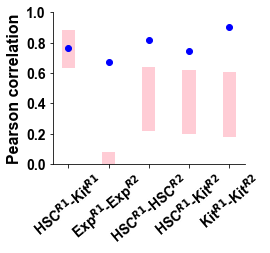

In [20]:
# data to plot

%run my_fig_config_0
simu_mean = np.array([mean_std_R1HSC_R1Kit[0],mean_std_R1Exp_R2Exp[0],mean_std_R1HSC_R2HSC[0],mean_std_R1HSC_R2Kit[0], mean_std_R1Kit_R2Kit[0]])
simu_std = np.array([mean_std_R1HSC_R1Kit[1],mean_std_R1Exp_R2Exp[1],mean_std_R1HSC_R2HSC[1],mean_std_R1HSC_R2Kit[1], mean_std_R1Kit_R2Kit[1]] )
real_data = np.array([mean_std_R1HSC_R1Kit[2],mean_std_R1Exp_R2Exp[2],mean_std_R1HSC_R2HSC[2],mean_std_R1HSC_R2Kit[2], mean_std_R1Kit_R2Kit[2]])
 
fig = plt.figure(figsize=(4,3.8)); ax = fig.add_subplot(1, 1, 1)
index = np.arange(len(simu_mean))
bar_width = 0.33
opacity = 0.8


 
# ax.bar(index,real_data,bar_width,alpha=opacity,color='pink')
# ax.errorbar(index,simu_mean,simu_std, fmt='^b',ecolor='darkgreen')

ax.bar(index,simu_mean-simu_std,bar_width,alpha=opacity,color='white')
ax.bar(index,2*simu_std,bar_width,alpha=opacity,color='pink',bottom=simu_mean-simu_std,label='Null model')
ax.plot(index,real_data,"ob",label='Data')

    
#plt.xlabel('Person')
ax.set_ylabel('Pearson correlation')
#plt.title('')
plt.xticks(index, ("HSC"+r"$^{R1}$"+"-Kit"+r"$^{R1}$", "Exp"+r"$^{R1}$"+"-Exp"+r"$^{R2}$","HSC"+r"$^{R1}$"+"-HSC"+r"$^{R2}$","HSC"+r"$^{R1}$"+"-Kit"+r"$^{R2}$", "Kit"+r"$^{R1}$"+"-Kit"+r"$^{R2}$"),rotation=40)
#ax.legend(frameon=False)
ax.set_ylim([0,1]) 
    
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.tight_layout()
plt.show()
fig.savefig(fig_dir+"R1R2_correlation_paper.eps")

In [21]:
# save variables in python file
with open(data_dir+"corr_mean_std_R1R2.py",'w') as file:
    file.write("mean_std_R1HSC_R1Kit={}\n".format(mean_std_R1HSC_R1Kit));
    file.write("mean_std_R1HSC_R2HSC={}\n".format(mean_std_R1HSC_R2HSC));
    file.write("mean_std_R1HSC_R2Kit={}\n".format(mean_std_R1HSC_R2Kit));
    file.write("mean_std_R1Kit_R2Kit={}\n".format(mean_std_R1Kit_R2Kit));
    file.write("mean_std_R1Exp_R2Exp={}\n".format(mean_std_R1Exp_R2Exp));
    
    
    
